In [4]:
using JSON
using PGFPlotsX
using PyCall
using Colors
using LaTeXStrings
using Glob
np = pyimport("numpy")

push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\pgfplotsset{compat=newest}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colormaps}")
push!(PGFPlotsX.CUSTOM_PREAMBLE, raw"\usepgfplotslibrary{colorbrewer}")
push!(PGFPlotsX.CUSTOM_PREAMBLE,raw"\usetikzlibrary{plotmarks}")

8-element Vector{String}:
 "\\pgfplotsset{compat=newest}"
 "\\usepgfplotslibrary{colormaps}"
 "\\usepgfplotslibrary{colorbrewer}"
 "\\usetikzlibrary{plotmarks}"
 "\\pgfplotsset{compat=newest}"
 "\\usepgfplotslibrary{colormaps}"
 "\\usepgfplotslibrary{colorbrewer}"
 "\\usetikzlibrary{plotmarks}"

# B3LYP vs Gau-PBE Gaps


In [9]:
dgaps = np.loadtxt("../YAMBO/count-2/hybrid-gaps-data/gaps_b3lyp_gaup_1.dat")


6×5 Matrix{Float64}:
 0.0  1.29572   1.36011   1.32791   0.032199
 1.0  1.2504    1.28341   1.2669    0.016503
 2.0  1.18896   1.19179   1.19038   0.001416
 3.0  1.1197    1.10477   1.11224   0.0074645
 4.0  1.0378    1.00597   1.02188   0.0159155
 5.0  0.950647  0.898952  0.924799  0.0258475

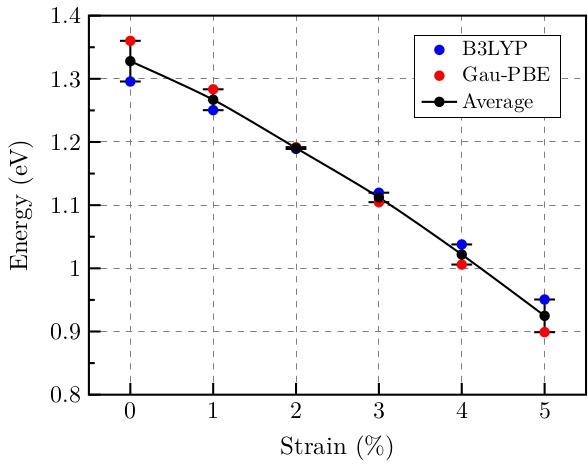

In [13]:


pd = @pgf TikzPicture({ })

eg = @pgf Axis(
{
"name=pa",
"width=10.0cm", "height=8.0cm",
"xmin=-0.5,xmax=5.5",
"ymin=0.8,ymax=1.4",
"major tick length = 2mm",
"minor tick length = 1mm",
"minor x tick num=0",
"minor y tick num=1",
"xtick distance=1",
"ylabel style={scale=1.2}",
"xlabel style={scale=1.2}",
raw"xlabel = {Strain ($\%$)}",
raw"ylabel = {Energy (eV)}",
"every axis plot/.style={smooth,line width=1pt}",
"every axis/.append style={tick style = {line width=1pt,black}, ticklabel style={scale=1.15}}",
"axis line style={line width=1pt,line cap=round}",
"ytick pos=left",
"xtick pos=left",
 xmajorgrids,
"major x grid style={gray,dashed}",
 ymajorgrids,
 "major y grid style={gray,dashed}",
"/pgfplots/error bars/error bar style={line width=1pt,solid}",
"/pgfplots/error bars/error mark options={line width=1pt,mark size=5pt,rotate=90}",
# "legend columns=6",
# "transpose legend",
"legend style={
                cells={anchor=west},
                inner xsep=3pt,
                inner ysep=1pt,
                nodes={scale=1},
                at={(0.95,0.95)},
anchor=north east
}",
},
Plot({"mark=*,only marks,blue"},Table("x"=>dgaps[:,1],"y"=>dgaps[:,2])),
LegendEntry("B3LYP"),
Plot({"mark=*,only marks,red"},Table("x"=>dgaps[:,1],"y"=>dgaps[:,3])),
LegendEntry("Gau-PBE"),
Plot({"mark=*,error bars/y dir=both","error bars/y explicit,black"},Coordinates(dgaps[:,1],dgaps[:,4];yerror=dgaps[:,5])),
LegendEntry("Average"),
)
push!(pd,eg)
display("image/png", pd)
pgfsave("../Manuscript_images/fig-3.pdf",pd)
